<a href="https://colab.research.google.com/github/kayodeolusanya/Data-Scientist-Salaries-Python-/blob/main/Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv('/content/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [55]:
# To check for duplicates
df.duplicated().sum()

0

In [56]:
# To check for missing values
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [57]:
# To drop  the feature we dont need (Unnamed: 0)
df = df.drop(['Unnamed: 0'], axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [58]:
df.shape


(607, 11)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [60]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [61]:
# Renaming some values in the features for better understanding

# For Experience_level feature - we replace EN, MI, SE, EX with Entry Level, Mid Level, Senior Level and Expert.
df['experience_level'].replace('EN', 'Entry_Level', inplace=True)
df['experience_level'].replace('MI', 'Mid_Level', inplace=True)
df['experience_level'].replace('SE', 'Senior_Level', inplace=True)
df['experience_level'].replace('EX', 'Expert', inplace=True)

# For Employment_type feature - we replace CT, FL, FT, PT with Contract, Freelance, Full_Time and Part_Time.
df['employment_type'].replace('CT', 'Contract', inplace=True)
df['employment_type'].replace('FL', 'Freelance', inplace=True)
df['employment_type'].replace('FT', 'Full_Time', inplace=True)
df['employment_type'].replace('PT', 'Part_Time', inplace=True)

# For Remote_ratio feature - we replace 0, 50, 100 with No(<25%), Hybrid(50%)  and Full(>90%) Respectively.
df['remote_ratio'].replace(0, 'No(<25%)', inplace=True)
df['remote_ratio'].replace(50, 'Hybrid(50%)', inplace=True)
df['remote_ratio'].replace(100, 'Full(>90%)', inplace=True)

# For Company_size Column - repalce S, M, L with Small(<50), Medium(<500), and Large(>500) Respectively.
df['company_size'].replace('S', 'Small(<50)', inplace=True)
df['company_size'].replace('M', 'Medium(<500)', inplace=True)
df['company_size'].replace('L', 'Large(>500)', inplace=True)

#view
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid_Level,Full_Time,Data Scientist,70000,EUR,79833,DE,No(<25%),DE,Large(>500)
1,2020,Senior_Level,Full_Time,Machine Learning Scientist,260000,USD,260000,JP,No(<25%),JP,Small(<50)
2,2020,Senior_Level,Full_Time,Big Data Engineer,85000,GBP,109024,GB,Hybrid(50%),GB,Medium(<500)
3,2020,Mid_Level,Full_Time,Product Data Analyst,20000,USD,20000,HN,No(<25%),HN,Small(<50)
4,2020,Senior_Level,Full_Time,Machine Learning Engineer,150000,USD,150000,US,Hybrid(50%),US,Large(>500)


In [62]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

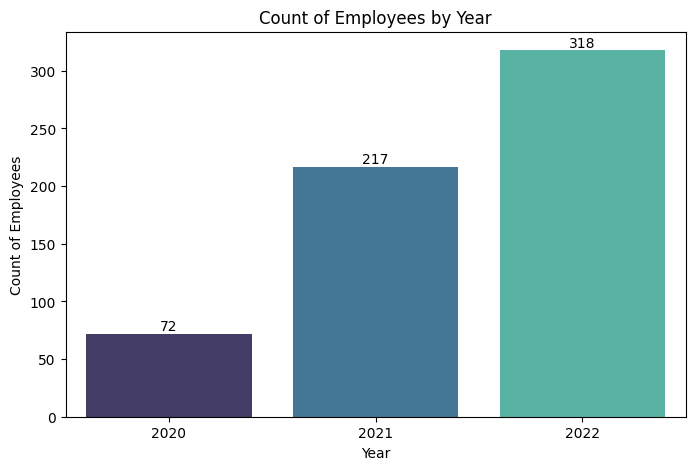

In [63]:
plt.figure(figsize=(8,5))
wy = sns.countplot(x='work_year', data=df, palette='mako')
values = df['work_year'].value_counts(ascending= True).values
wy.bar_label(container=wy.containers[0], labels=values);
plt.xlabel('Year')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Year');

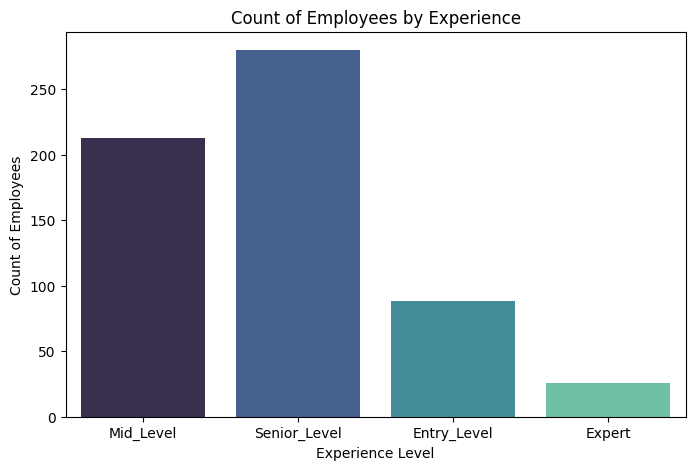

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='experience_level', data=df, palette='mako')
plt.xlabel('Experience Level')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Experience')
plt.show()

AttributeError: ignored

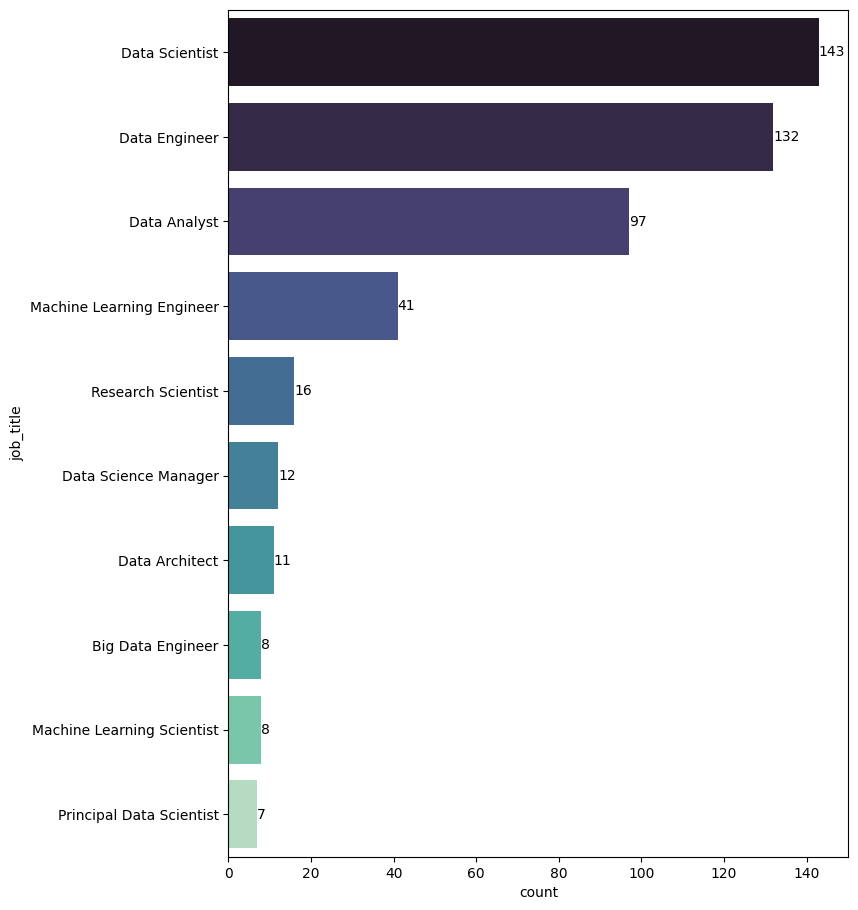

In [107]:
plt.figure(figsize=(8,11))
jt = sns.countplot(y=df["job_title"], order=df["job_title"].value_counts(ascending= False).index[:10], palette='mako')
values = df['job_title'].value_counts(ascending=False).values
jt.bar_label(container=jt.containers[0], labels=values);
plt.ylabel('Job Title')
plt.xlabel('Count')
plt.title('Top 10 Jobs by Job Title')
plt.show()

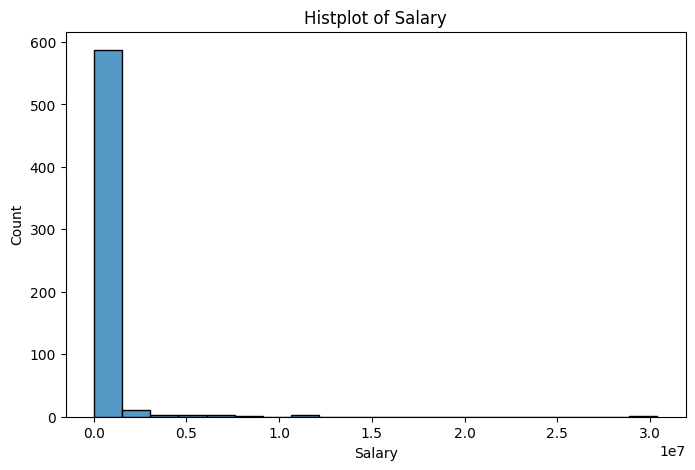

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary'], bins=20)
plt.title('Histplot of Salary')
plt.xlabel('Salary')
plt.show()

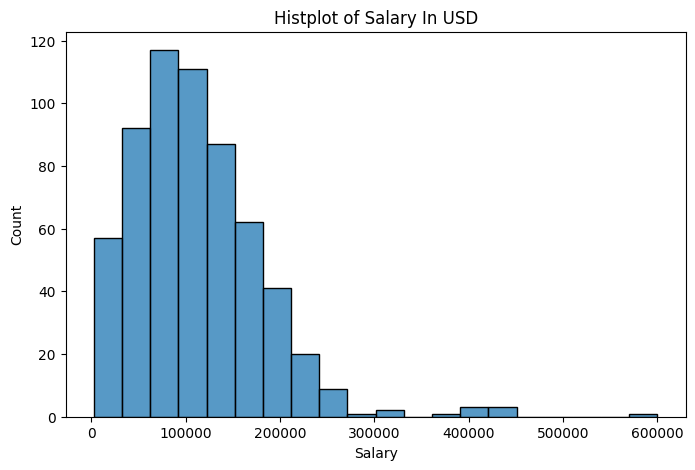

In [67]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], bins=20)
plt.title('Histplot of Salary In USD')
plt.xlabel('Salary')
plt.show()

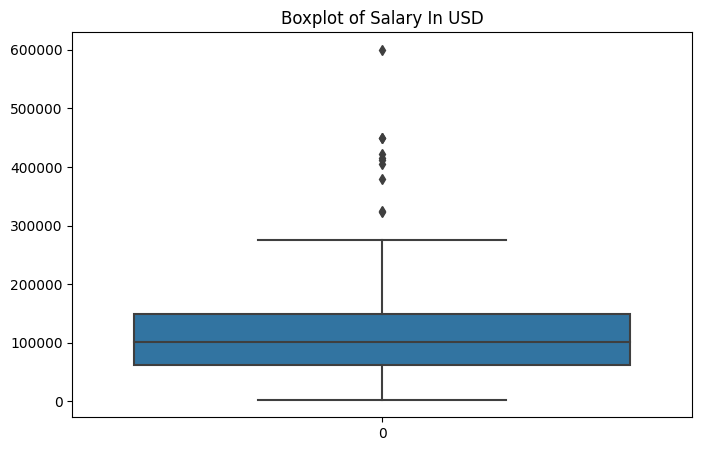

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['salary_in_usd'])
plt.title('Boxplot of Salary In USD')
plt.show()

In [84]:
outlier = df[df['salary_in_usd']>298000]
outlier

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,Expert,Full_Time,Director of Data Science,325000,USD,325000,US,Full(>90%),US,Large(>500)
33,2020,Mid_Level,Full_Time,Research Scientist,450000,USD,450000,US,No(<25%),US,Medium(<500)
63,2020,Senior_Level,Full_Time,Data Scientist,412000,USD,412000,US,Full(>90%),US,Large(>500)
97,2021,Mid_Level,Full_Time,Financial Data Analyst,450000,USD,450000,US,Full(>90%),US,Large(>500)
157,2021,Mid_Level,Full_Time,Applied Machine Learning Scientist,423000,USD,423000,US,Hybrid(50%),US,Large(>500)
225,2021,Expert,Contract,Principal Data Scientist,416000,USD,416000,US,Full(>90%),US,Small(<50)
252,2021,Expert,Full_Time,Principal Data Engineer,600000,USD,600000,US,Full(>90%),US,Large(>500)
482,2022,Expert,Full_Time,Data Engineer,324000,USD,324000,US,Full(>90%),US,Medium(<500)
519,2022,Senior_Level,Full_Time,Applied Data Scientist,380000,USD,380000,US,Full(>90%),US,Large(>500)
523,2022,Senior_Level,Full_Time,Data Analytics Lead,405000,USD,405000,US,Full(>90%),US,Large(>500)


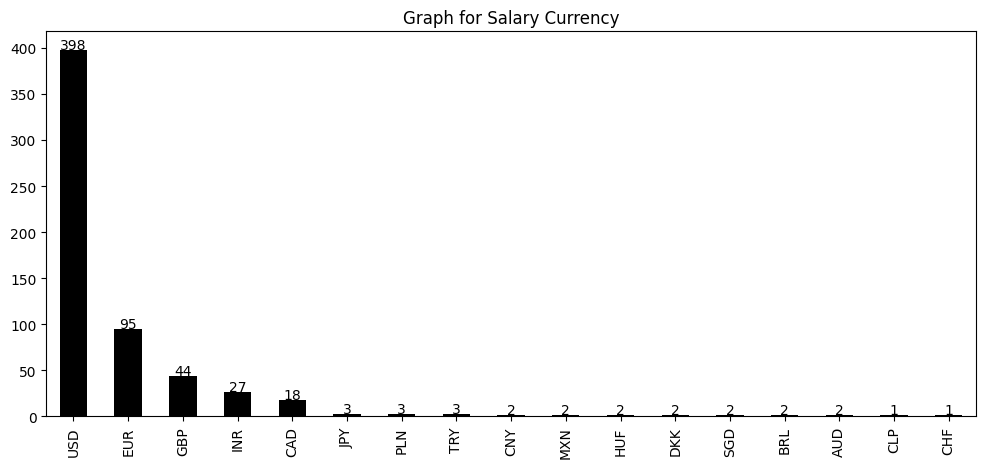

In [70]:
plt.figure(figsize=(12,5))
counts= df['salary_currency'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.title('Graph for Salary Currency')
plt.show()

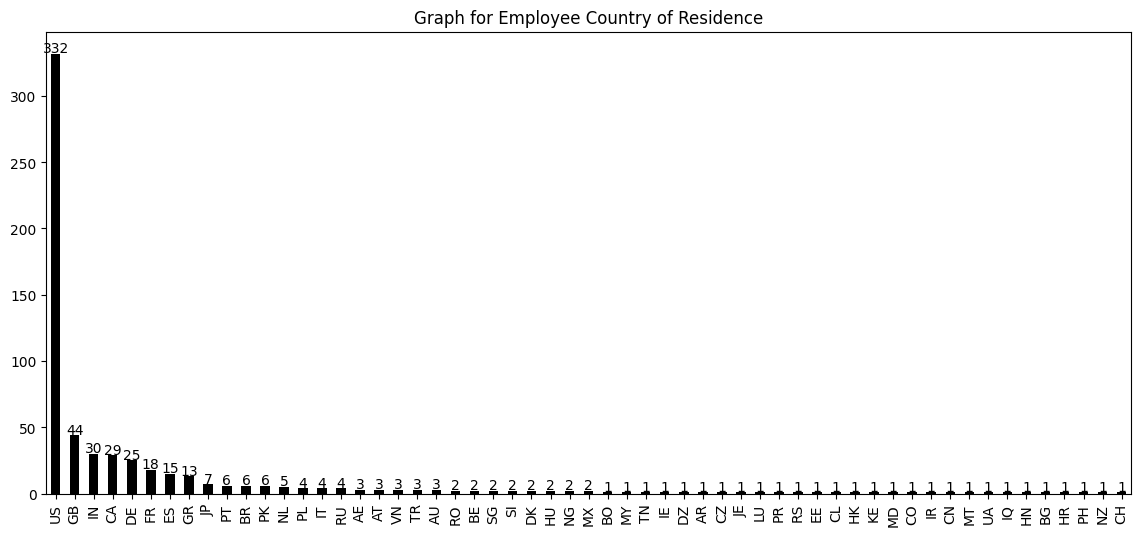

In [71]:
plt.figure(figsize=(14,6))
counts= df['employee_residence'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.title('Graph for Employee Country of Residence')
plt.show()

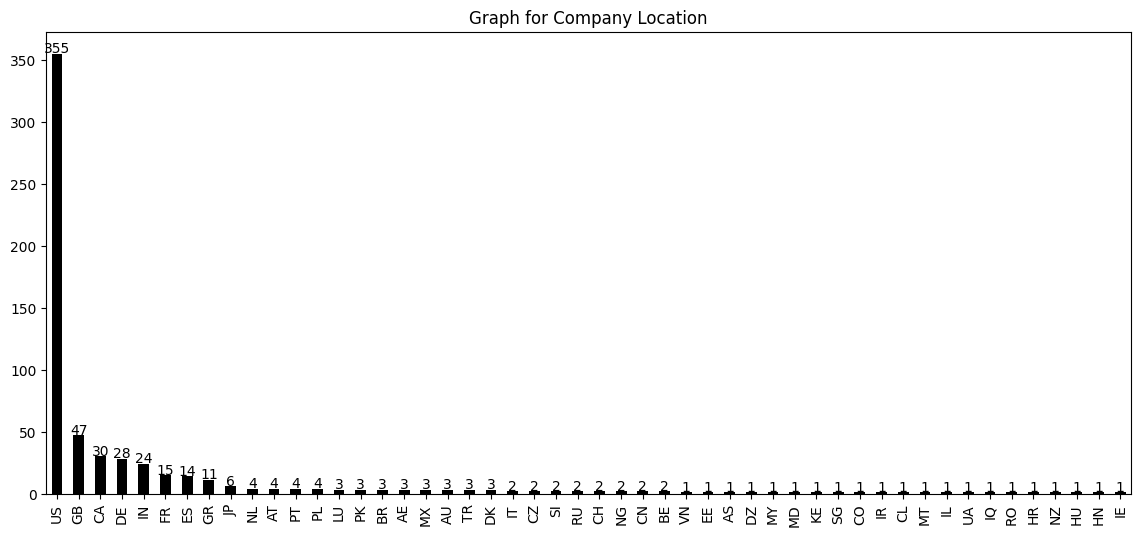

In [72]:
plt.figure(figsize=(14,6))
counts= df['company_location'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.title('Graph for Company Location')
plt.show()

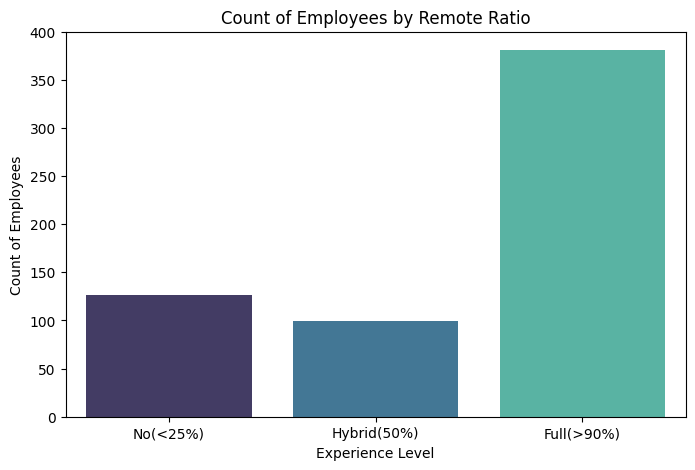

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x='remote_ratio', data=df, palette='mako')
plt.xlabel('Experience Level')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Remote Ratio')
plt.show()

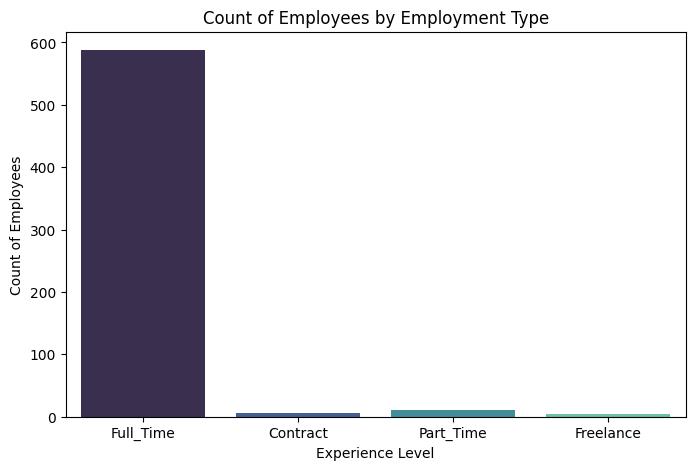

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x='employment_type', data=df, palette='mako')
plt.xlabel('Experience Level')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Employment Type')
plt.show()

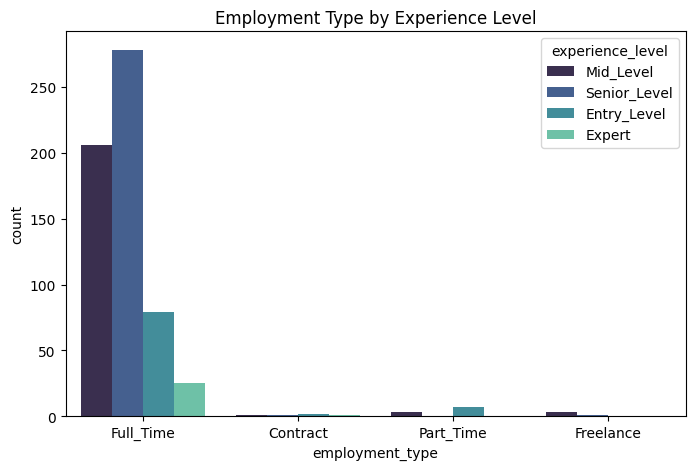

In [100]:
# Employment Type by Experience Level

plt.figure(figsize = (8,5))
sns.countplot( x = "employment_type", data = df, hue = "experience_level", palette='mako')
plt.title('Employment Type by Experience Level')
plt.show()

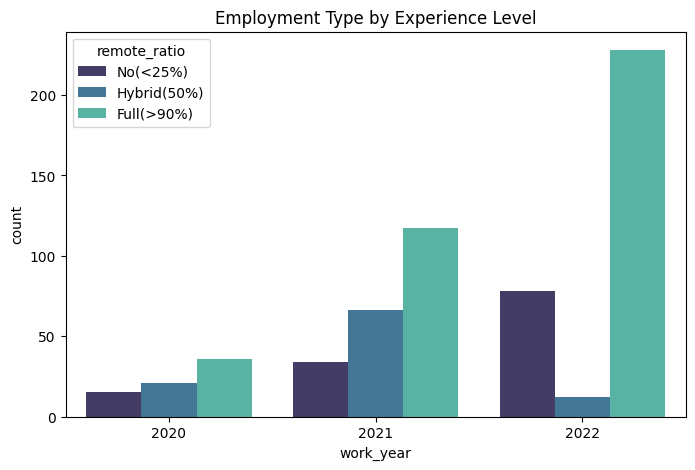

In [99]:
# Remote Ratio by Work Year

plt.figure(figsize = (8,5))
sns.countplot( x = "work_year", data = df, hue = "remote_ratio", palette='mako')
plt.title('Employment Type by Experience Level')
plt.show()

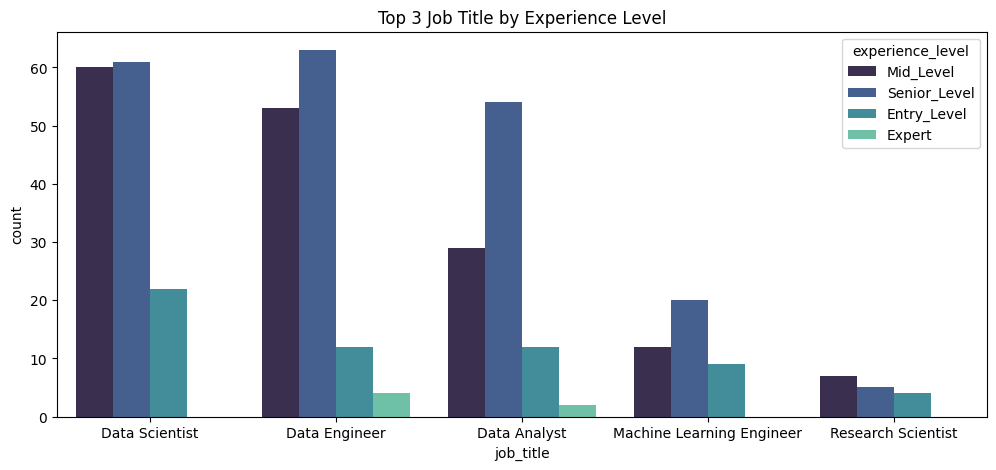

In [103]:
# Top 5 Job Title by Experience Level

plt.figure(figsize = (12,5))
orders=df['job_title'].value_counts().index[:5]
sns.countplot( x = "job_title", data = df, hue = "experience_level", order=orders, palette='mako')
plt.title('Top 3 Job Title by Experience Level')
plt.show()

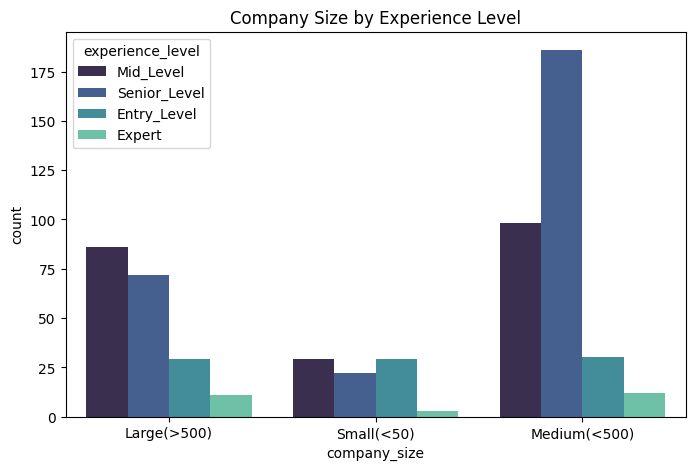

In [106]:
# Company Size by Experience Level

plt.figure(figsize = (8,5))
sns.countplot(x = "company_size", data =df, hue = "experience_level", palette= 'mako')
plt.title('Company Size by Experience Level')
plt.show()

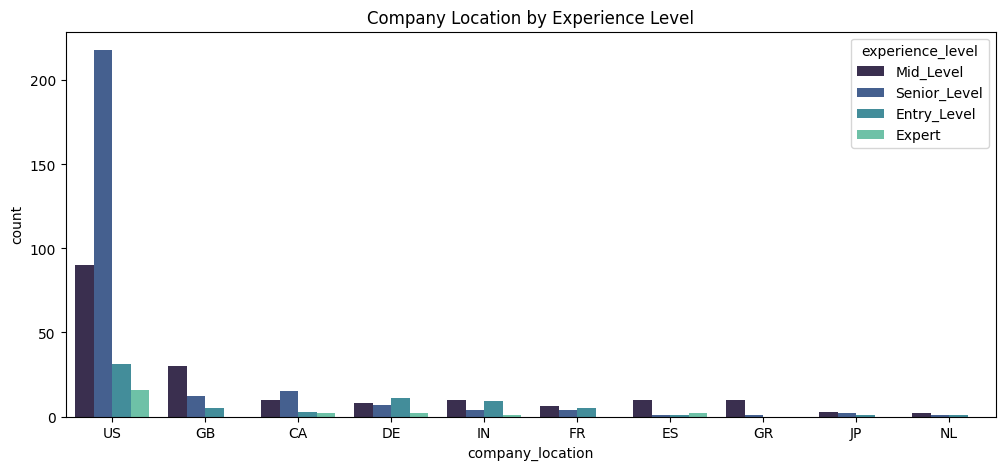

In [111]:
# Top 10 Location by Experience Level

plt.figure(figsize = (12,5))
orders = df['company_location'].value_counts().index[:10]
sns.countplot(x = "company_location", data = df, hue = "experience_level", order = orders, palette ='mako')
plt.title('Company Location by Experience Level')
plt.show()

In [75]:
print(df['employment_type'].value_counts())

Full_Time    588
Part_Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64


In [76]:
df['company_size'].unique()

array(['Large(>500)', 'Small(<50)', 'Medium(<500)'], dtype=object)